# 改进模型拟合

有一个矛盾,为了达到完美的拟合,模型必须向过拟合,才能知道哪里是边界.

面对一个机器学习的问题,最初的目标是找到一个表现出一些泛化能力的模型,然后可以过拟合.之后的的事情是对抗过拟合改善模型的泛化能力.使其能达到第一个里程碑: 模型的表现要超过简单方法的基线.

在初始训练模型时常见的 3 个问题

- 训练无效,训练损失不会随着时间而减小.
- 训练效果很好,但是模型的效果无法打败基线.
- 训练和验证效果都很好,模型效果也超过了基线,但是似乎一直没有过拟合出现.


## 调整梯度下降的参数

有时候会碰到,无论如何训练,损失总是过早的停滞了.这个时候还记得前文对随机数据的实验吗?即使是随机的数据也能训练出一个模型,当然这个模型谈不上什么泛化能力.因此这个问题一定有办法解决.

通常这样的情况发生总是梯度下降的配置问题.

- 模型初始权重分布/优化器选择/学习率/批次大小等等都互相依赖.
- 其他调整学习率和批次大小就足够了,特别是学习率.


In [2]:
from keras.datasets import mnist
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 773.4385 - accuracy: 0.4169 - val_loss: 2.5926 - val_accuracy: 0.2307
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 3.5820 - accuracy: 0.2998 - val_loss: 2.6129 - val_accuracy: 0.2976
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.1792 - accuracy: 0.2894 - val_loss: 2.1505 - val_accuracy: 0.2597
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8153 - accuracy: 0.2804 - val_loss: 1.9261 - val_accuracy: 0.3409
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 3.3082 - accuracy: 0.3177 - val_loss: 3.5284 - val_accuracy: 0.3422
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4613 - accuracy: 0.3384 - val_loss: 4.6577 - val_accuracy: 0.3982
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7220 - accuracy: 0.3270 - val_loss: 2.7155 - val_accuracy: 0.3407
Epoc

学习率是 1 ,无论如何训练,模型的准确度一直都在 0.2 ~ 0.3 之间.接下来我们把学习率改成 1e-2.


In [3]:
from keras.datasets import mnist
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3575 - accuracy: 0.9130 - val_loss: 0.1785 - val_accuracy: 0.9507
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1390 - accuracy: 0.9634 - val_loss: 0.1703 - val_accuracy: 0.9623
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1146 - accuracy: 0.9725 - val_loss: 0.1688 - val_accuracy: 0.9670
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1009 - accuracy: 0.9787 - val_loss: 0.1695 - val_accuracy: 0.9716
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0860 - accuracy: 0.9822 - val_loss: 0.2249 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0788 - accuracy: 0.9842 - val_loss: 0.2372 - val_accuracy: 0.9690
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9863 - val_loss: 0.2458 - val_accuracy: 0.9706
Epoch 

调整过学习率,模型训练就正常多了..

如果出现损失一直无法降低等情况

- 降低或提高学习率.过高的学习率会使更新大大超过适当的拟合范围,模型就一直在这个范围左右反复横跳.过低的学习率反而使得学习的速度非常慢,简单的几轮训练验证几乎完全不可能够到合适的拟合范围.
- 增加批次大小,批次的样本更多,会使得信息量加大,噪音相对更小.

以上,终于有一个能让训练开始的配置了.


## 更好的结构以改进结果

好了,现在有了一个初步能训练的模型了.但是在测试集上的指标无论怎样都没能超过基线.这或许是能遇到的最糟糕的情况了.根本上遇到了问题,没有通用解决方案,只有一些提示.

- 输入数据根本没有包含所需要的信息量.
- 使用的神经网络架构不适合这个问题.大部分机器学习的问题上都有类似最佳实践的网络架构.尝试换用更适合架构.


## 增大模型容量

一旦获得了合适的模型,下一步是将这个模型过拟合,探索欠拟合/过拟合的边界.

还是一个 mnist 的例子


In [6]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])  #一个输出层
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(train_images,
                                train_labels,
                                epochs=40,
                                batch_size=128,
                                validation_split=0.2)  #抽取 0.2 作为验证集


Epoch 1/40
375/375 [==============================] - 1s 4ms/step - loss: 0.6714 - accuracy: 0.8349 - val_loss: 0.3589 - val_accuracy: 0.9055
Epoch 2/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9027 - val_loss: 0.3080 - val_accuracy: 0.9137
Epoch 3/40
375/375 [==============================] - 1s 4ms/step - loss: 0.3158 - accuracy: 0.9125 - val_loss: 0.2912 - val_accuracy: 0.9194
Epoch 4/40
375/375 [==============================] - 1s 4ms/step - loss: 0.2994 - accuracy: 0.9160 - val_loss: 0.2820 - val_accuracy: 0.9218
Epoch 5/40
375/375 [==============================] - 1s 4ms/step - loss: 0.2899 - accuracy: 0.9189 - val_loss: 0.2758 - val_accuracy: 0.9240
Epoch 6/40
375/375 [==============================] - 1s 4ms/step - loss: 0.2827 - accuracy: 0.9209 - val_loss: 0.2732 - val_accuracy: 0.9228
Epoch 7/40
375/375 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.9222 - val_loss: 0.2700 - val_accuracy: 0.9245
Epoch 

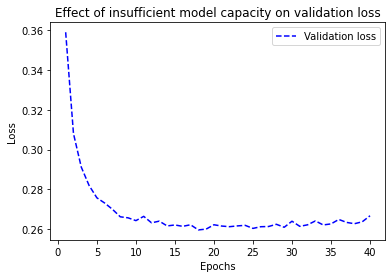

In [7]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 41)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

只有一个层,原书是 20 次,这里改成 40 次,似乎结果也一样,验证损失停留在了 0.26,并没有随着训练轮次表现出过拟合.


In [8]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(train_images,
                                train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)  #抽取 0.2 作为验证集


Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3683 - accuracy: 0.8956 - val_loss: 0.1996 - val_accuracy: 0.9430
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1610 - accuracy: 0.9521 - val_loss: 0.1311 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1113 - accuracy: 0.9670 - val_loss: 0.1107 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0853 - accuracy: 0.9751 - val_loss: 0.1069 - val_accuracy: 0.9688
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.1086 - val_accuracy: 0.9681
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0975 - val_accuracy: 0.9724
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0955 - val_accuracy: 0.9725
Epoch 

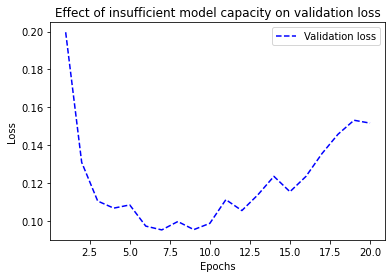

In [11]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

记住,无论何种情况下,一个正常的机器学习模型都可以到过拟合的状态.验证损失无法显示过拟合,很有可能是模型的容量不足.

当换加到 3 层时,随着训练到 7~8 轮次,就到达了欠拟合/过拟合的分界.
